## Intent to use this guide as refresher for course material studied for  Neural Networks from Udacity.

This guide does not go in depth explaining fundamentals, one should go through proper course material prior using this guide. 

## PERCEPTRONS : Wx + b = 0

W = Weights

X = Inputs

b = Bias

## AND Perceptron

In [10]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -2.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -2.0                    0          Yes
      0          1                  -1.0                    0          Yes
      1          0                  -1.0                    0          Yes
      1          1                   0.0                    1          Yes


## NOT Perceptron

In [11]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = -1.0
weight2 = -2.0
bias = 1.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   1.0                    1          Yes
      0          1                  -1.0                    0          Yes
      1          0                   0.0                    1          Yes
      1          1                  -2.0                    0          Yes


## Perceptron Algorithm

Analyze Data

In [12]:
import pandas as pd

data_df = pd.read_csv('data.csv', names=['X[0]', 'X[1]', 'y'])

print ("CSV contains {} rows & {} columns".format(data_df.shape[0], data_df.shape[1]))

data_df.head(5)

CSV contains 100 rows & 3 columns


,X[0],X[1],y
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


Split Data File to separate X & Y

In [13]:
X = data_df.iloc[:,0:2].copy()
print (X.shape)
print (X.head(5))

(100, 2)
      X[0]      X[1]
0  0.78051 -0.063669
1  0.28774  0.291390
2  0.40714  0.178780
3  0.29230  0.421700
4  0.50922  0.352560


In [14]:
y = data_df.iloc[:,2].copy()
y.shape
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: y, dtype: int64

In [15]:
## Convert dataframe to matrix to strip headers & also use easy slicing method as used by base functions above

X = X.as_matrix()
y = y.as_matrix()

### Write Base Functions for Perceptron

Note: **Step Function** is additional step which takes score from perceptron equation Wx+b=0 and convert the same into 0 or 1 as final output. This would help achieve sort of Boolean nature resultset as we have in dataset predicting whether perdiction (y_hat) is in line with y (actual label)

**Perceptron Trick**: So how do we draw the line in a way that it does best job filtering data or drawing line to separate the data for perdiction purposes.

So as example if line equation is 3x₁ + 4x₂ - 10 = 0  (Wx+b=0)

And if our goal is to go closer to point (example 4,5) on Positive Side(i.e. correct lables), what we do is minus Weights from these points & 1 from Bias Unit .. i.e. 3-4x₁ + 4-5x₂ + (-10-1) = 0 which simplifies to
-x₁ - x₂ -11 = 0  and this trick will possibly not just go closer to line but even cross the line.

To go at slower progression, we introduce something called as ** Learning Rate **, it is nothing but factor of point(4,5) - say if learning rate is 0.1 then pur equation would be

3-.4x₁ + 4-.5x₂ + (-10-.1) = 0 which simplifies to

2.6x₁ + 3.5x₂ -10.1 = 0

And, we do this n number if times until our **Error Rate** reduce, which introduces two new terms,

**Error Rate** is the distance of line from the point, father it is higher the error, hence goal is to reduce the error.

**Epochs** is the  number iterations we run to make line come closer to points or in other words reduce the error to 0 or minimum

In [16]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    #print ("Anshoo", X[i].shape, W.shape)
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    
    #print(" Min and Max for x & y..", x_min, x_max,y_min, y_max )
    
    #W = np.array(np.random.rand(2,1))
    #TRY BOTH WEIGHTS, RANDOM WEIGHTS DO NOT SCALE WELL,
    #IF WE NORMALIZE THE WEIGHTS, WE GET BETTER RESULTS
    W = np.random.normal(scale=1/1**.5, size=(2,1))
    
    b = np.random.rand(1)[0] + x_max
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


Time to Run the Perceptron Training Algorithm

In [17]:
boundary_lines_to_plot = trainPerceptronAlgorithm(X, y)

TypeError: unsupported operand type(s) for *: 'zip' and 'float'

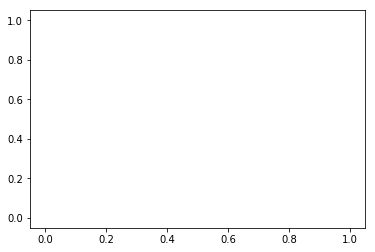

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

# M IS SLOPE, B IS INTERCEPT FOR LINE EQUATION
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, .80)
    l_eq = (m_*x+b_)[0]
    plt.plot(x, l_eq, color)

    
m,b = zip(*boundary_lines_to_plot)
m_ = zip(*m)
b_ = zip(*b)

display(m_,b_)
plot_points(X,y)


### Log Loss Error Function

So we talked about error rate briefly above. However, we did not apply error rate in our calculation yet, which we wil do now, however, before we do so, the error rate must be **continous** in nature, i.e every iteration should tell us whether we are getting closer to our goal or heading father .. 

This is good segue to introduce **Log Loss Error Method**. This method introduce penalty to every point or input data, points already in right classified zones have least penalty and points classified in wrong zones have highest penalties, so at every epoch, we access total error, with goal to minimize or completely eliminate the error. 

Since we are able to build error function which can continuouly calculate the error, we can use **Gradient Descent** to solve our problem.

### Continous Predictions with Sigmoid Function

Step Function are discrete in nature, which tells whether prediction matches actual label or not, however, since we are able to calculate error which is continuous in nature, we will have to calulate perdictions which are also continuous in ouput i.e. knowing how close we are or how off we are to the actual, Step Function does not provide that information, this is where **Sigmoid** function come sin handy, this function tells us probabiliy of how far or close we are to our goal.

sigmoid(x) = 1/(1+e-x)

So if we were to compare to Step Function of Values 0 and 1, Sigmoid will give probability close to 0% for negatives values and close to 100% for positive values && 50% for (0,0), i.e. mid point.

Just to put it all together, we will repalce Step Function with Sigmoid to achieve continuous output.

y_hat_discrete = StepFunction(Wx+b)

y_hat_continuous = SigmoidFunction(Wx+b)


### Multi-Class Solution using Softmax Function

Before we go see how to write Softmax, let's see why we have to use this. So we studied about continuous perdictions using Sigmoid Function but that solution work well if we have one class as an output and subsequent probalities, what if we have more than one class as an output. Well we do have scores which are higher for respectives classes however to derive accurate probablities we will have to normalize scores, example : if we are predicting  breeds of Dog, with output as Golden Retreiver, German Shepherd, Autralian Shepherd and our equation produce scores like:

Golden Retreiver = 2

German Shepherd = 1

Autralian Shepherd = 0

we can normalize as 2/(2+1+0), 1/(2+1+0), 0/(2+1+0)

however there is one major issues, what if one of the scores is negative, which is plausible, this may turn divisor to zero, and in turn probability to infinity which does not make sense.

Idea is good though, to solve this, one can make use of  exponential function, as the result of that is always positive, so if we apply this our normalization equation, we get something line this ..

Softmax Function = e(Xi) / ( e(Xi) +..+ e(Xn) )

Applying this to our example equation:

SF_Probablities = e(2)/(e(2)+e(1)+e(0)), e(1)/(e(2)+e(1)+e(0)), e(0)/(e(2)+e(1)+e(0))
SF_Probablities = 67%, 24%, 9%

for respective breeds of dogs. As always these must add upto 100%.

So let's dive into coding of Softmax

In [ ]:
import numpy as np

# Write a function that takes as input a list of numbers, and returns
# the list of values given by the softmax function.
def softmax(L):
    expL = np.exp(L)
    sumExpL = sum(expL)
    result = []
    for i in expL:
        result.append(i*1.0/sumExpL)
    return result

L = (1,2,3)

sm_values_ret = softmax(L)

print sm_values_ret


### One Hot Encoding

So it may be obvious that all our outputs are numerical, but it is not always that we have numerical inputs, we can convert them though.

It is easy in case of one class, we can define true as 1 and false as 0, but what if we have more classes, the approach which helps is called One-Hot Encoding.

What we do here is create matrix for clases, and mark when true as example below:

        Input Class     Golden Retreiver?     German Shepherd?    Autralian Shepherd?
    Golden Retreiver          1                     0                   0
    German Shepherd           0                     1                   0
    Autralian Shepherd        0                     0                   1

### Maximum Likelihood

We pick the model which gove labels the highest probability, thus by maximizing the probability we pick the best possible model.

wrt computing this, we take the probabilities of each input of what it actually is, i.e. probability of RED being RED and BLUE being BLUE, multiply these probabilities across models, and model giving the highest P(all) is our goal and is also the best model.

So thus far we can summarize that **Probabilities are Important** and that **Better Model gives better overall Probability i.e. P(all)**, so how do we maximize probability, we also studied **Error Function**, and that minimizing error function gives better model, so is there a connection??, Let's see ..

However, before we go further, we are highly dependent on Product(Multiplication) to find maximized probablities so far, and products could be nasty in terms of computation, specifically when we compute over thousands of samples, and these tiny numbers which all sum upto 1 could lead to errors. We know that addition is better than multiplication in this case, and the best way we can covert this using addition is by using **log**, we know that 

**log(ab) = log(a) + log(b)** and this is precisely we need to ease our job .. 

One quick thing though, natural log(1) = 0, which means log values for our probabilities which are under 1 will be in -ve, to fix this, we will instead do - log(probability), this will take care negative values.

Our revised equation would be:<br>
** For individual point : -log(probablity)** <br>
** Overall it can demostrated as: -log(a) + -log(b) .. + -log(n)**

### Cross Entropy
The above approach of taking ** -log(probability) ** is also referred as Cross Entropy. Key thing to note here is that, **Higher the Probability results into Lower Cross Entropy**, which makes sense since -log(p) will result in low number for higher values. This is also true for all individual points(inputs), which means if we look at log(p) for each point, ** higher values means higher ERROR rate** * **lower value means lower ERROR rate**. [ Just as reminder, we were caluclating distance of point from line earlier to derive error rate ]

Having said this, our goal dramatically has changed from ** Maximizing Probablity to Minimizing Cross Entropy **

So we're getting somewhere, there's definitely a connection between probabilities and error functions, and it's called Cross-Entropy. This concept is tremendously popular in many fields, including Machine Learning. Let's dive more into the formula, and actually code it!

Formula for CE for Two Classes is simple

** CE = - ∑ᵢ( Yᵢ*ln(Pᵢ) + (1-Yᵢ)*ln(1-Pᵢ) **

For multiple classes, this can be revised as..

** CE = - ∑ᵢ ∑𝚓 Yᵢ𝚓*ln(Pᵢ𝚓) **

In [ ]:
import numpy as np

def cross_entropy(Y, P):
    Y = np.float_(Y)
    P = np.float_(P)
    return -np.sum(Y * np.log(P) + (1 - Y) * np.log(1 - P))

# Simplified version below ..
#def cross_entropy(Y, P):
#    CE = 0
#    
#    for i in range(len(P)):
#        CE += Y[i]*np.log(P[i]) + (1-Y[i]) * np.log(1-P[i])
#        
#    return -CE

So with above we can revise our **'Error Funtion'** as below:

Taking example of differnetiating red dots with blue dots ..

If y = 1
P(Blue) = y_hat
Error = -ln(y_hat)


If y = 0
P(Red) = 1-P(Blue) == 1-y_hat
Error = -ln(1- y_hat)

Overall Error:

Error = -(1-y)(ln(1-y_hat)) - y.ln(y_hat)

Error Function = -1/m ∑ᵢ₌₁․․m  (1-Yᵢ)(ln(1-yᵢ_hat)) + Yᵢ*ln(yᵢ_hat) 

Rewriting the same in terms if W,b

** Error Function Binary Class **

    E = -1/m ∑ᵢ₌₁․․m  (1-Yᵢ)(ln(1-yᵢ_hat)) + Yᵢ*ln(yᵢ_hat)
    E(W,b) = -1/m ∑ᵢ₌₁․․m  (1-Yᵢ)(ln(1-σ(Wxⁱ+b)) + Yᵢ*ln(σ(Wxⁱ+b))


** Error Function Multi-Class **

    E = -1/m ∑ᵢ₌₁․․m  ∑𝚓₌₁․․n Yᵢ𝚓*ln(ŷᵢ𝚓)
    E(W,b) = -1/m ∑ᵢ₌₁․․m  ∑𝚓₌₁․․n Yᵢ𝚓*ln(σ(Wxⁱʲ+b))
    
** These are same formula's as listed above in Cross Entropy Section, just elaborated for W,b and with one example ..

### Logistic Regression 

Logistic regression is named for the function used at the core of the method, the logistic function.

Logistic regression uses an equation as the representation, very much like linear regression. Input values (X) are combined linearly using weights or coefficient values to predict an output value (y).

A key difference logistic regression demostrate that the output value being modeled is a binary value (0 or 1) rather than a numeric value Linear Regression demonstrate

Our goal is to reduce overall **Error (i.e Cross Entropy to be lower)**

**Gradient Descent** is the process of minimizing a function by following the gradients of the cost function.

We start with some random Weights and Bias<br>
σ(Wx+b)

and by applying **Gradient Descent** derive new weights and bais which optmize our line or in other words reduce error, we refer new weights as W prime and b prime..<br>
σ(W'x+b')

So how do we compute **Gradient Descent Step** mathemmatically, let's see it below ..

Taking a step means, we will compute:<br>
W' = Wᵢ - α 𝔡E/𝔡Wᵢ<br>
b' = b - α 𝔡E/𝔡b

α - Learning Rate <br>
𝔡 - Derivative

So by using new Weights and Bias we can say that new Prediction is better than what we have with prior.<br>
ŷ = σ(W'x+b')

With this let's get hand dirty by finding Derivatives of Error Function wrt W or b..

Sigmoid Function has really nice derivatives ..<br>
σ′(x)=σ(x)(1−σ(x))

Without explaing the complex math ..

** 𝔡E/𝔡W𝚓 = -(y-ŷ)X𝚓 <br>**
** 𝔡E/𝔡b = -(y-ŷ) **

In other words ..
∇E = −(y−ŷ)(x1,....xn,1)

If you think about it, this is fascinating. The gradient is actually a scalar times the coordinates of the point! And what is the scalar? Nothing less than a multiple of the difference between the label and the prediction. What significance does this have?

    Closer the label to the prediction smaller the gradient
    OR Father the label from the prediction, larger the gradient.
    
Let's revisit **Gradient Descent Step**

Therefore, since the gradient descent step simply consists in subtracting a multiple of the gradient of the error function at every point, then this updates the weights in the following way:

w′ᵢ = wᵢ − α[−(y−ŷ)xᵢ]

which is equivalent to

** w′ᵢ = wᵢ + α(y−ŷ)xᵢ **

Similarly, it updates the bias in the following way:

** b' = b - α(y−ŷ) **

Note: Since we've taken the average of the errors, the term we are adding should be 1/m⋅α instead of α, but as α is a constant, then in order to simplify calculations, we'll just take 1/m⋅α to be our learning rate, and abuse the notation by just calling it α

So we have all the ingerdients to write Gradient Descent Algorithm ..

In nut shell, we keep executing Gradient Step, n number times, until our error function is minimized or is zero, the n number of steps is called **Epochs**

Now this look very similar to perceptron algorithm we wrote above .. we will study the differences soon ..


# Gradient Descent Algorithm

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

# See the Note for Display Function Below ..
def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

So I was puzzled how are we computing slope and intercept for line plotting, 
line has equation y = mx + c ..

Found below explanation which makes all sense, if we refer code from training logic below where display is called, it will make things much clearer ..

In Python, the indices start at 0, so the equation W1x1 + W2x2 + b = 0 is coded as

W[0] x[0] + W[1] x[1] + b=0.

In the graph, x[1] (i.e., x2) plays the role of y, and x[0] (i.e., x1), plays the role of x.

Since matplotlib draws lines using the form y = mx + c, where m is the slope of the line and c is the y-intercept, we need to rewrite the line to this form, i.e., we rewrite Wx + b = 0 into the y = mx + c form, so we solve for x[1]:

W[0] x[0] + W[1] x[1] + b = 0 —> x[1] = (-W[0] / W[1]) x[0] + (-b / W[1])

with the slope m = (-W[0] / W[1]) and the y-intercept c = (-b / W[1]). Now we can pass m and c to matplot lib who willl happily draw the line for us.



## Reading and plotting the data

In [ ]:
data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])

plot_points(X,y)
plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def output_formula(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    d_error = -(y - output)
    weights -= learnrate * d_error * x
    bias -= learnrate * d_error
    return weights, bias

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [ ]:
np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

In [ ]:
train(X, y, epochs, learnrate, True)

#### Difference between Gradient Descent & Perceptron Algorithm

Both have similar end goals and looks very similar, however the subte differences in operations are:

1. Gradient Descent can take any values for $\hat{y}$ vs Preceptron Algorithm can only take discrete values like 0 & 1.
2. Preceptron Algorithm stops if all imputs are classified properly, it does not try to reduce error rate beyond, meaning if we have Blue Dot, in Blue Zone but on border line i.e. low accuracy, Preceptron Algorithm will not do anything, this is where Gradient Descent outshines, it will keep trying to optimize this Blue Dot to go father away from line to have hogher probaility and lower error rate.

# Neural Networks 

We have enough Basics covered by this point to start understanding Neural Networks.

Thus far we defined robust models which can hadle enough complexity discerte or continous, simple class or multi-class - however these are were all LINEAR in nature.

In read world though, data is not always linearly seperable. We need curves!! And this where Neural Networks come in to the picture, idea is very simple, we take multiple linear models (Perceptrons), combine them to form non-linear outputs, and even further, we can combine non-linear models to even create more non-linearity in outputs. Below pictures hopefully justify the thought process.

Combining two linear models (perceptrons)
<img src="images/NN1.png" alt="Drawing" style="width: 500px;"/>

Representation as perceptron nodes
<img src="images/NN2.png" alt="Drawing" style="width: 500px;"/>

Magic happens when we join the output of these as one model
<img src="images/NN3.png" alt="Drawing" style="width: 500px;"/>

Simplifying above picture
<img src="images/NN4.png" alt="Drawing" style="width: 500px;"/>

Simplifying output to just show final output
<img src="images/NN5.png" alt="Drawing" style="width: 500px;"/>

Good segue to introduce ** NN Layers, as Input, Hidden, Output **
<img src="images/NN6.png" alt="Drawing" style="width: 500px;"/>

Example of more than 2 perceptrons in hidden layer to compute more complex output
<img src="images/NN7.png" alt="Drawing" style="width: 500px;"/>

Example of more complex input, more than 2 which takes in 3D Space, intermediate layes gives linear planes, and final output a non-linear 3D Space
<img src="images/NN8.png" alt="Drawing" style="width: 500px;"/>

Good seque to introduce ** Deep Neural Networks **, as depicted below, we can have more than one hidden layer toicals compute more compex outputs
<img src="images/NN9.png" alt="Drawing" style="width: 500px;"/>

And Even Multiple Classes as output via same network
<img src="images/NN10.png" alt="Drawing" style="width: 500px;"/>

Just more generic depiction of how much more complex it can get, most of the real world example are Deep NN with many hidden layers and many output layers
<img src="images/NN12.png" alt="Drawing" style="width: 500px;"/>



## Neural Netwroks has 2 mains flows:

## 1. Feedforward
## 2. Backpropagation

** Feedforward ** is something we have seen already in above description, we get end result as y_hat & error wrt target & for every input.

** Backpropagation ** is understanding error rate, and applying the derivate of error rate wrt each node to compute revised Weights and Bias. 

We do this combination of Feedfoward & Backproparation n number of times (**epochs**) to get better model eventually.

I will keep complexity of Chain Rule and computing Derivates away from this jupyter, and focus on end result and formulas which are important for calculation.

**Feedforward View and Mathematical Equation**
<img src="images/FF.png" alt="Drawing" style="width: 700px;"/>


**Backpropation View and Mathematical Equation, taking one example of W11 & going deeper on how to compute it, subseqently we have to do this for every node.**
<img src="images/BP1.png" alt="Drawing" style="width: 700px;"/>
<img src="images/BP2.png" alt="Drawing" style="width: 700px;"/>


## Mean Squared Error Function

So we studied about Log-Loss Function above, first we started deriving by finding distance of point from line, later we imprivised using Cross Entropy deriving error function to help optimize our models using Logistic Regression applying Gradient Descent

There are other Error Functions, one of them is Mean Squared Error Function. As the name says, this one is the mean of the squares of the differences between the predictions and the labels.

Obvious chioce for finding error or knowing how well we performed is: 
E = (y - $\hat{y}$)

However, problem with this equation is that if prediction is too high error will be negative, and if pediction is low, error wil be positive, we would rather keep the error be same by squaring the same ..

E = (y - $\hat{y}$)²

We could have alternatuvely used absolute, but squaring makes math nice also penalize outliers more than small errors.

This is  error for one prediction though, and ideally we would like to know the error for whole network, improvising equation as ..

E = 1/2 Σμ(Yμ - $\hat{Y}$μ)²

We add 1/2 to make math better.

This equation is called ** SSE - Sum of Squared Errors **

** So if SSE is High Network is making bad preictions and if Low, Good Predictions **

From before we saw that one weight update can be calculated as:

Δwᵢ = ηδxᵢ

with the error term δ as

δ=(y−y^)f′(h)=(y−y^)f′(∑wᵢxᵢ)

Remember, in the above equation (y−y^) is the output error, and f′(h) refers to the derivative of the activation function, f(h). We'll call that derivative the output gradient.

Now I'll write this out in code for the case of only one output unit. We'll also be using the sigmoid as the activation function f(h). 


In [ ]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

def sigmoid_prime(x):
    """
    # Derivative of the sigmoid function
    """
    return sigmoid(x) * (1 - sigmoid(x))

learnrate = 0.5
x = np.array([1, 2, 3, 4])
y = np.array(0.5)

# Initial weights
w = np.array([0.5, -0.5, 0.3, 0.1])

### Calculate one gradient descent step for each weight
### Note: Some steps have been consilated, so there are
###       fewer variable names than in the above sample code

# TODO: Calculate the node's linear combination of inputs and weights
h = np.dot(x, w)

# TODO: Calculate output of neural network
nn_output = sigmoid(h)

# TODO: Calculate error of neural network
error = y - nn_output

# TODO: Calculate the error term
#       Remember, this requires the output gradient, which we haven't
#       specifically added a variable for.
error_term = error * sigmoid_prime(h)
# Note: The sigmoid_prime function calculates sigmoid(h) twice,
#       but you've already calculated it once. You can make this
#       code more efficient by calculating the derivative directly
#       rather than calling sigmoid_prime, like this:
# error_term = error * nn_output * (1 - nn_output)

# TODO: Calculate change in weights
del_w = error_term * x

# TODO: W' - Improvised Weights
w_prime = w + (learnrate * del_w)
print('Nodes Output (Linear Combination i.e. h) :')
print(h)
print("")

print('Neural Network output [Applying Activation Sigmoid(h) or y^] :')
print(nn_output)
print("")

print('Amount of Error (y - y^) :')
print(error)
print("")

print('Output Gradient f\'(h)) :')
print(sigmoid_prime(h))
print("")

print('Error Term (Error * f\'(h)) :')
print(error_term)
print("")

print('Change in Weights: [Delta W = learnrate * error_term * x]')
print(del_w)
print("")

print('W\' - Improvised Weights [W + Delta W]:')
print(w_prime)
print("")


## continuing ... Mean Squared Error Function

We're going to make a small change to how we calculate the error here. Instead of the **SSE**, we're going to use the **mean of the square errors (MSE)**. Now that we're using a lot of data, summing up all the weight steps can lead to really large updates that make the gradient descent diverge. To compensate for this, you'd need to use a quite small learning rate. Instead, we can just divide by the number of records in our data, mm to take the average. This way, no matter how much data we use, our learning rates will typically be in the range of 0.01 to 0.001. Then, we can use the MSE (shown below) to calculate the gradient and the result is the same as before, just averaged instead of summed.


Equation:
E = 1/2m Σμ(Yμ - $\hat{Y}$μ)²

## Let's implement network again using MSE and Numpy

**Quick tip on initialization of weights:**

We want these to be small such that the input to the sigmoid is in the linear region near 0 and not squashed at the high and low ends. It's also important to initialize them randomly so that they all have different starting values and diverge, breaking symmetry. So, we'll initialize the weights from a normal distribution centered at 0. A good value for the scale is 1/$\sqrt{n}$ where nn is the number of input units. This keeps the input to the sigmoid low for increasing numbers of input units.

weights = np.random.normal(scale=1/n_features**.5, size=n_features)

** Quick Note on Numpy**

Numpy provides a function that calculates the dot product of two arrays, which conveniently calculates hh for us. The dot product multiplies two arrays element-wise, the first element in array 1 is multiplied by the first element in array 2, and so on. Then, each product is summed.

-- input to the output layer
output_in = np.dot(weights, inputs)

With this let's dive into code, we will be using graduate school admissions data (found at http://www.ats.ucla.edu/stat/data/binary.csv). This dataset has three input features: GRE score, GPA, and the rank of the undergraduate school (numbered 1 through 4). Institutions with rank 1 have the highest prestige, those with rank 4 have the lowest.

<img src="images/admissions-data.png" alt="Drawing" style="width: 700px;"/>

The goal here is to predict if a student will be admitted to a graduate program based on these features. For this, we'll use a network with one output layer with one unit. We'll use a sigmoid function for the output unit activation.

** Data cleanup **
You might think there will be three input units, but we actually need to transform the data first. The rank feature is categorical, the numbers don't encode any sort of relative values. Rank 2 is not twice as much as rank 1, rank 3 is not 1.5 more than rank 2. Instead, we need to use dummy variables to encode rank, splitting the data into four new columns encoded with ones or zeros. Rows with rank 1 have one in the rank 1 dummy column, and zeros in all other columns. Rows with rank 2 have one in the rank 2 dummy column, and zeros in all other columns. And so on.

We'll also need to standardize the GRE and GPA data, which means to scale the values such they have zero mean and a standard deviation of 1. This is necessary because the sigmoid function squashes really small and really large inputs. The gradient of really small and large inputs is zero, which means that the gradient descent step will go to zero too. Since the GRE and GPA values are fairly large, we have to be really careful about how we initialize the weights or the gradient descent steps will die off and the network won't train. Instead, if we standardize the data, we can initialize the weights easily and everyone is happy.

This is just a brief run-through, we will start with data clean up script first to achoeve something like below ..

<img src="images/example-data.png" alt="Drawing" style="width: 700px;"/>

### Step1: Data Clean Up & Preparation

In [ ]:
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

print (" Raw Data Excerpt ...")
print ("")
print (admissions.head(5))

print (" Raw Data Statistics ...")
print ("")
admissions.describe()

In [ ]:
# Make dummy variables for rank
#pd.get_dummies - Create Dummy Columns with Appropriate Values based on Rank Column, Prefix Col names with Rank
#pd.concat (combine prior columns with Dummy Columns)
#data.drop Drop the Rank Column
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

print (" Creating Dummy Columns from Rank (see explanation above for on why we are doing this) ...")
print ("")
data.head(5)

In [ ]:
# Standarize features
# Look at mean and standard deviation for Columns GRE and GPA
# Take Each Row for that Columns, Column_Value - Mean / Std to normlaize the data
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
data.head(5)

In [ ]:
# Split off random 10% of the data for testing
np.random.seed(42)

print ("Values passed to the random functions for understanding purposes...:")
print ("")
print ("data.index == Indices for all Values in data collection")
print ("")
print ("size (i.e. 90% of data) == {}".format(int(len(data)*0.9)))
print ("")

sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)

print ("Sample Random Indexes...: {}".format(sample[0:5]))
print ("")

data, test_data = data.ix[sample], data.drop(sample)

print ("Two Collections Data (90% of data), Test_Data(10% of data), \
with each having # of records as: {}, {}".format(data.shape[0],test_data.shape[0]))

In [ ]:
# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']

#Simple enuogh to understand, column named admit is target as in 'y', 
# we will drop that as features for both data and test data

print ("Sample Features..")
print ("")
print (features.head(5))


print ("Sample Targets..")
print ("")
print (targets.head(5))

print ("Sample Test Features..")
print ("")
print (features_test.head(5))


print ("Sample Test Targets..")
print ("")
print (targets_test.head(5))


### Step2: Build and Train Network

Now that the data is ready, we see that there are six input features: gre, gpa, and the four rank dummy variables.

We will use these to train our network.

In [ ]:
import numpy as np
#from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 10000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Activation of the output unit
        #   Notice we multiply the inputs and the weights here 
        #   rather than storing h as a separate variable 
        output = sigmoid(np.dot(x, weights))

        # The error, the target minus the network output
        error = y - output

        # The error term
        #   Notice we calulate f'(h) here instead of defining a separate
        #   sigmoid_prime function. This just makes it faster because we
        #   can re-use the result of the sigmoid function stored in
        #   the output variable
        error_term = error * output * (1 - output)

        # The gradient descent step, the error times the gradient times the inputs
        del_w += error_term * x

    # Update the weights here. The learning rate times the 
    # change in weights, divided by the number of records to average
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

## Multilayer Percptrons

Thus far we have build network with only one layer, now we will apply what we have to learn to build multi layer network, we will start with network with 1 Input Layer, 1 1 Hidden Layer and 1 Output Layer.

Note though thus far we have been experimenting with single output, with exmaples going foward we will see more complex cases with output layer comoatining more than one outputs ..

Key mathematical contruct we need to rememebr here us Matrices, Vectors and their multiplication principals.

Without going in to too much detials, let's look at quick rules on Vector to Matrix multiplication as that is what we need to understand upcoming coding lab ..


** Quick depliction of Weight indices with Hidden Layer in play **
<img src="images/network-with-labeled-weights.png" alt="Drawing" style="width: 500px;"/>

Before, we were able to write the weights as an array, indexed as wᵢ

But now, the weights need to be stored in a matrix, indexed as w${_i}{_j}$

Each row in the matrix will correspond to the weights leading out of a single input unit, and each column will correspond to the weights leading in to a single hidden unit. For our three input units and two hidden units, the weights matrix looks like this:

<img src="images/multilayer-diagram-weights.png" alt="Drawing" style="width: 500px;"/>

Be sure to compare the matrix above with the diagram shown before it so you can see where the different weights in the network end up in the matrix.

To initialize these weights in Numpy, we have to provide the shape of the matrix. If features is a 2D array containing the input data:

\# Number of records and input units<br>
n_records, n_inputs = features.shape<br>
\# Number of hidden units<br>
n_hidden = 2<br>
weights_input_to_hidden = np.random.normal(0, n_inputs**-0.5, size=(n_inputs, n_hidden))

This creates a 2D array (i.e. a matrix) named weights_input_to_hidden with dimensions n_inputs by n_hidden. Remember how the input to a hidden unit is the sum of all the inputs multiplied by the hidden unit's weights. So for each hidden layer unit, h${_j}$, we need to calculate the following:
<br>
<img src="images/hidden-layer-weights.gif" alt="Drawing" style="width: 200px;"/>


n this case, we're multiplying the inputs (a row vector here) by the weights. To do this, you take the dot (inner) product of the inputs with each column in the weights matrix. For example, to calculate the input to the first hidden unit, j=1, you'd take the dot product of the inputs with the first column of the weights matrix, like so:

<img src="images/input-times-weights.png" alt="Drawing" style="width: 500px;"/>

And for the second hidden layer input, you calculate the dot product of the inputs with the second column. And so on and so forth.

In Numpy, you can do this for all the inputs and all the outputs at once using np.dot

hidden_inputs = np.dot(inputs, weights_input_to_hidden)

You could also define your weights matrix such that it has dimensions n_hidden by n_inputs then multiply like so where the inputs form a column vector:


<img src="images/inputs-matrix.png" alt="Drawing" style="width: 500px;"/>


Note: The weight indices have changed in the above image and no longer match up with the labels used in the earlier diagrams. That's because, in matrix notation, the row index always precedes the column index, so it would be misleading to label them the way we did in the neural net diagram. Just keep in mind that this is the same weight matrix as before, but rotated so the first column is now the first row, and the second column is now the second row.

**Making a column vector**
You see above that sometimes you'll want a column vector, even though by default Numpy arrays work like row vectors. It's possible to get the transpose of an array like so arr.T, but for a 1D array, the transpose will return a row vector. Instead, use arr[:,None] to create a column vector:

print(features)
> array([ 0.49671415, -0.1382643 ,  0.64768854])

print(features.T)
> array([ 0.49671415, -0.1382643 ,  0.64768854])

print(features[:, None])
> array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])
       
Alternatively, you can create arrays with two dimensions. Then, you can use arr.T to get the column vector.

np.array(features, ndmin=2)
> array([[ 0.49671415, -0.1382643 ,  0.64768854]])

np.array(features, ndmin=2).T
> array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])
       
       
I personally prefer keeping all vectors as 1D arrays, it just works better in my head.

**Programming Lab**
Below, we'll implement a forward pass through a 4x3x2 network, with sigmoid activation functions for both layers.

In [ ]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


# TODO: Make a forward pass through the network
hidden_layer_in = np.dot(X,weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

output_layer_in = np.dot(hidden_layer_out,weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

### cont... Backpropagation

Wonderful, thus far we build feed foward multi-layer (2 layer in this case) network.

Now, it is time to compute error rate, as we have done before, with difference that error rate has to be compute for each layer & each node for that layer, compute optimized weights. Run the network for n epochs until we minimize the error rate to satisfaction level.

This whole is process is something we already know is called Backpropagation.

Since we have multiple layers in play - let's go through quick example to understand this prior we code the same ..

Let's walk through the steps of calculating the weight updates for a simple two layer network. Suppose there are two input values, one hidden unit, and one output unit, with sigmoid activations on the hidden and output units. The following image depicts this network. (Note: the input values are shown as nodes at the bottom of the image, while the networks output value is shown as y^ at the top. The inputs themselves do not count as a layer, which is why this is considered a two layer network.)

<img src="images/backprop-network.png" alt="Drawing" style="width: 150px;"/>

<img src="images/BProp.png" alt="Drawing" style="width: 1000px;"/>

Time to code!!

Let's start with how to caluclate the error for output and hidden layers..

In [ ]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])

## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)

## Backwards pass
## TODO: Calculate output error
error = target - output

# TODO: Calculate error term for output layer
output_error_term = error * output * (1 - output)

# TODO: Calculate error term for hidden layer
hidden_error_term = np.dot(output_error_term, weights_hidden_output) * \
                    hidden_layer_output * (1 - hidden_layer_output)

# TODO: Calculate change in weights for hidden layer to output layer
delta_w_h_o = learnrate * output_error_term * hidden_layer_output

# TODO: Calculate change in weights for input layer to hidden layer
delta_w_i_h = learnrate * hidden_error_term * x[:, None]

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)


Since we have calculated the errors for each layer, let's build out backpropagation on schools graduation data we used earlier..

We are taking simple network of one hidden layer & one output..

In [ ]:
import numpy as np
#from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 3000
learnrate = 0.01

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)

        output = sigmoid(np.dot(hidden_output,
                                weights_hidden_output))

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1 - output)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = np.dot(output_error_term, weights_hidden_output)

        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)

        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        del_w_input_hidden += hidden_error_term * x[:, None]

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


### Backprop is really really important, even though higher level frameworks like Tensor will do these for us, it is very important to understand the fundamentals. Some additions links to study further ..

https://medium.com/@karpathy/yes-you-should-understand-backprop-e2f06eab496b

https://www.youtube.com/watch?v=59Hbtz7XgjM

# Optimzation Techniques

Now, we have learned basics of NN end-to-end, it may be obvious that success heavily depends on varity of hyperparameters. And hence we have to understand & layout some foundational guidelines/techniques which can help us stay on track achieving desired results, we will refer these techniques as optimization guidelines.

Prioe we dig deep with techniques, let's understand the various patterns and problems which would require better knowledge of these.

### Patterns/Problems:

**1. Overfitting (High Variance) **- Overfitting is the state when model errors rate is very low on training set, but it does not perform very well on generic data set, i.e. we have trained our model too much specific to a dataset. Example, we are able to classify dogs in brown, white furs, ut any other color of dogs are misclassified. This is also indication that our model is too complex with many layers ..

** 2. Underfitting (High Bias) **- Underfitting is the state when trained model is too loose or not trained enough, or way too generic in nature, or training error and testing errors are high. It is able to classify but with lot of mistakes & ignoring subtle boundaries which provides relevance to the subject.

> **Mitigations (Overfitting / Underfitting) **

>>**1. Early Stopping ( for Under and Overfitting both ) **
So what is the right state?? It is not an easy answer, one way one can perceive the optimal state but observing errors between **traning and test data**, so far we did not talk about training abd test data, we just refered data as input data. What we do is split input data to 2 buckets called training and test, we use training data to train the model, model never see the test data. Once we are happy with state that trainin is optimal we use the optimized model on test data.

>>With clarity on what test and training data buckets are: Below diagram show observations on these for n number of epochs, we can see that state which is referred as just right, has test data error reached to a minimum point called **Goldilocks Spot** and start to increase from there, this is point we start to tend towards overfitting, i.e. spots generalizing and starts memorizing.

<img src="images/UOFitting.png" alt="Drawing" style="width: 500px;"/>

>>This plot is also called ** Model Complexity Graph **

<img src="images/CGraph.png" alt="Drawing" style="width: 500px;"/>


>>**2. Regularization (Overfitting)**

>>Regulirazation is another technique we apply to mitigate overfitting, essence is to penalize lager weights. It is taking the old error function we had and adding either lamba(sum of weights) or  lamba(sum of weights squared).

<img src="images/regularization.png" alt="Drawing" style="width: 500px;"/>


>>When to use L1 vs L2 ??

>>Both have different Sparsity rate as output. 

>>**L1 Regularization ** produce more sparse vectors, so if we want to reduce number of weights & end up with small set we can use L1. It is also good for feature selection, sometimes we have hundreds of features, and with L1 technique we can select the ones whcih are important & turn rest in to zeros.

>>**L2 Regularization ** on the other hand, tends not to favor sparse veactors since it tries to maintain all the weights homogeneously small. This one normally gives better results for training models so it's the one we will use the most.


>>Intution of these techniques using an example below:
<img src="images/regularization1.png" alt="Drawing" style="width: 500px;"/>

>> Cheat Sheet:
<img src="images/regularization2.png" alt="Drawing" style="width: 500px;"/>

>>**3. Dropouts (Overfitting)**

>>This is another simple yet effective and very popular technique. What we do here is that define probability of each node be dropped by certain percentage. The reasoning behind this is that there are nodes with heavy weights, and they start to influence outcome of the network, when we drop each nodes in this manner, every node get fair share to influence the outcome. What we do is define probability like 20%, which means each node gets dropped 20% of the time. 

** 3. Vanishing Gradient **
Above two links to go in depth talk about Backpropagation spot light issues like Vanishing Graient. In summary, if we look at sigmoid function below, at the extreme left and right outcomes are pretty much flat, which means the gradient is almost near zero ..

<img src="images/vg1.png" alt="Drawing" style="width: 500px;"/>

Just to recall, Backpropagation apply chain rule, which means these gradient gets multiplied, and have overall very tiny effect, or in other words we move super tiny steps.

<img src="images/vg2.png" alt="Drawing" style="width: 500px;"/>

As repurcussion, this makes training difficult, as Gradient Descent makes very small changes to weights, in other words, gradient descent takes very very tiny steps and may never reach at the bottom of the mount everest as shown below ..

<img src="images/vg3.png" alt="Drawing" style="width: 500px;"/>

>** Mitigations (Vanishing Graient, Use different activation functions)**
>>** 1. tanh :** This activation function though very similat to sigmoid has lager derivatives which provide great advances to NN.
    
<img src="images/tanh.png" alt="Drawing" style="width: 500px;"/>
    
>> **2. ReLU (Rectified Linear Units):** This activation function very simple, it says, if you are positive, I will return same value, if you are negative I will return 0. Another way  to see ouput is between x & xero. This function is used a lot instead of sigmoid, as it can dramatically improve the performace of the network without sacrificing much accuracy. Since it's derivative is 1 for positive numbers. It is fascinating that this function which barely breaks linearilty can lead to such complex non-linear solutions.

>>Below is example of multi-layer network with bunch of ReLU activation units (shown as relu graph symbol). Note that the last unit is sigmoid, as we still need final output as probabiliy between zero and one.However, if we let the end up units being ReLU we can end up with regression models, as the predictive value. We will see more during RNN segment ..
    
<img src="images/relu.png" alt="Drawing" style="width: 500px;"/>
<img src="images/relu1.png" alt="Drawing" style="width: 500px;"/>
    
** 4. Local Minima **
During Gradient Descent, there could be mutiple slopes however there is only one overall minimum and rest are defined as local minimum. If process reach at local minimum it may get stuck there and may not see option to process in any direction further. Mitigations - TBD

<img src="images/lm.png" alt="Drawing" style="width: 500px;"/>

>** Mitigations **

>> **1. Random Restart** : One way to solve this is to restart at a few different random places. This increases probability that we get to the global minimum or at least a pretty good local minimum.

<img src="images/lm1.png" alt="Drawing" style="width: 500px;"/>

>> **2. Increase Momentum**: Idea here is to increase the momentum to push us over local minima and have the process not get stuck here rather progress towards global minimum. This can be achieved but not just taking gradient of last step but average of last few steps, we also know that last step is most relevant and the ones prior are not that much relevant, so we introduce new hyper-parameter called Beta (Momentum), this factor is nothing but weighing how much each step should influence our decision, and if you see equation below, Beta for prior steps decrease the inlfuence as it is applied as multinomial. Having said this, it will drift us away from the Global Minimum a bit but not that much --- theoritically it seems vague on why this would work to get us over local minimum and why not global minimum but in practice it works pretty well.

<img src="images/momentum.png" alt="Drawing" style="width: 500px;"/>

** 5. Gradient Descent vs Stochastic Gradient Descent **

**Gradient Descent** we take one step with all the data and try to acheieve overall minima. The cost we pay is huge memory footprint and massive computational power.

SGD in contrast, subset the data in n bathes and do n number of passes on each batch of data, which may not be as accurate as GD but it does take us in right direction progressively. The advantage here is that we can get sense of direction early on and also cost wrt memory and computational power neded is much less, offcourse we will apply SGD on overall data eventually (instead of one go & in batches).

** 6. Learning Rate Decay **

What learning rate to use, if we use high learning rate, we may miss local minima, however if we use small learning rate, we slow down the process.

<img src="images/lr.png" alt="Drawing" style="width: 500px;"/>

*Best learning rate is the one whcih decrease as model gets closer to the solution.* . We will see later that Keras has some options to let us do this.

<img src="images/lr1.png" alt="Drawing" style="width: 500px;"/>


** 7. Error Functions **: Lastly, there are various choice of error functions which made the list but we did not study. However is the list for reference purposes:
- Mount Errorest (Studied)
- Mount Kilimanjerror (Studied)
- Mount Reinerror
- Mount Ves-Oops-Vius
- EyjafJallaJoKull / EyjafVillaJoKull

# Evaluation Metrics 

Now that we know how to train neural networks, and how to optimize their training,, we need to know how to evaluate their behavior properly. For this, we use certain very useful metrics. In this section, we'll learn some of the most common metrics used in deep learning, and also in machine learning in general.

### 1. Confusion Matrix - Tells us how good our model is..

<img src="images/em1.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em2.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em3.png" alt="Drawing" style="width: 500px;"/>

**Type 1 and Type 2 Errors**
Sometimes in the literature, you'll see False Positives and True Negatives as Type 1 and Type 2 errors. Here is the correspondence:

Type 1 Error (Error of the first kind, or False Positive): In the medical example, this is when we misdiagnose a healthy patient as sick.
Type 2 Error (Error of the second kind, or False Negative): In the medical example, this is when we misdiagnose a sick patient as healthy.

### 2. Accuracy - Reflects how many inputs did we classify correctly ..

A = Correctly Classfied Points / All Inputs

Code Hint: sklearn has library to compute this (see image below)

<img src="images/em4.png" alt="Drawing" style="width: 500px;"/>

**Accuracy is not always a good measure**, look at example below, model lables are such that perdicts all good ones as good correct and also predicts fraud transactions as correct, but if we see ratio model safely says all transactions are good with high accuracy but problem is that it does not catch any bad ones .. so if data is skewed like this one, it is not good to use accuracy score.

<img src="images/em5.png" alt="Drawing" style="width: 500px;"/>

It is the same case if we lable all records as bad, in this case we are catching all good ones!

<img src="images/em6.png" alt="Drawing" style="width: 500px;"/>


### 3. Problem with False Negatives and Positives

Which one is more worse, actually it depends on the use case, let's look at the two examples we are dealing with below ..

<img src="images/em7.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em8.png" alt="Drawing" style="width: 500px;"/>

### 4. Precison and Recall (As Mitigation to Problem at #3)

<img src="images/em9.png" alt="Drawing" style="width: 500px;"/>

** Let's look at Precision first .. **
<img src="images/em10.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em11.png" alt="Drawing" style="width: 500px;"/>

<img src="images/em12.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em13.png" alt="Drawing" style="width: 500px;"/>


** Now let's look at recalls **

<img src="images/em14.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em15.png" alt="Drawing" style="width: 500px;"/>

<img src="images/em16.png" alt="Drawing" style="width: 500px;"/>
<img src="images/em17.png" alt="Drawing" style="width: 500px;"/>

### 5. ROC Curve (Receiver Operating Curve)

Basically we split the data, below given example is one dimensional data with 3 different split possibilities based on data.

What we do is calculate True Positive rate and False Positive Rate (formulas given below) and plot these for each observations. Observation area for most perfect is Square with Area as 1.

Intutions below:
<img src="images/rc1.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc2.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc3.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc4.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc5.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc6.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc7.png" alt="Drawing" style="width: 500px;"/>
<img src="images/rc8.png" alt="Drawing" style="width: 500px;"/>

# REGRESSION 

So far we looked at Classification cases, now we will study Regression which answeres how much, how much does this house cost etc

### Linear Regression

Looks at the data and draws the best fitting line. Using this line we can network make predicions.[ Remember Logitics Regression we studied above, which outputs 0 or 1 as output instead of numeric values as Linear Regression produces, subtle difference in outcomes]

<img src="images/lr2.png" alt="Drawing" style="width: 500px;"/>


## So how we draw the best fitting line?? **

Just a quick refresher on how line equation, notion of Slope and Intercept. And how these impact movement of line.

W1 denotes Slope, changes in same contributing to line slope, <br>
W2 denotes Intercept, chnages in same will result parallel movement

Some examples below ..

<img src="images/lr3.png" alt="Drawing" style="width: 500px;"/>
<img src="images/lr4.png" alt="Drawing" style="width: 500px;"/>
<img src="images/lr5.png" alt="Drawing" style="width: 500px;"/>
<img src="images/lr6.png" alt="Drawing" style="width: 500px;"/>
<img src="images/lr7.png" alt="Drawing" style="width: 500px;"/>



### 1. Absolute Trick : On how to move line faster towards point **

Something we have seen earlier too. So we will not detail too much.

If point(p,q) is above line, we will add p from slope and 1 from intercept, we will have multiplier alpha (learning rate) for gradual increase or decrease. 

<img src="images/lr8.png" alt="Drawing" style="width: 500px;"/>

If point(p,q) is below line, we will subtract p from slope and 1 from intercept, we will have multiplier alpha (learning rate) for gradual increase or decrease. 

<img src="images/lr9.png" alt="Drawing" style="width: 500px;"/>


### 2. Square Trick : On how to move line faster towards point **

This is very similar to Absolute Trick, only difference is that this trick is aware of how far the point is from line, ie. it also knows the vertical distance between line and point. In contrast Absolute Trick was not aware of how far we are from line, it just knew horizontal distance and was working purely based on that.

This makes change makes a great positive difference, as now the equation will move coiefficients larger for larger distances and smaller for smaller distances. 

<img src="images/lr10.png" alt="Drawing" style="width: 500px;"/>

Something, we get for free is that this technique serve for points below line without any change as p-p' will be negative. (For Absolute trick, we have separate rules/equations for point above and below line)

<img src="images/lr11.png" alt="Drawing" style="width: 500px;"/>


### 3. Gradient Descent Minimizing Error Function
We already know what Gradient Descent is, so I will skip any explanation. We will be using Gradient Descent as for Classification case to iterarte over network minimizing the overall error rate.

>#### Error Functions
>There are two most common error functions for Linear Regression, let's study both ..

>**3.1 Mean Absolute Error**

As studied before, we will take difference of distance from perdiction and target to understand error for single point. Subsequently, we will compute the same for all points and take mean of these. We have 1/m for our conveience, as will take derivatives of this error later simplifying the math. Also notice we have absolute of y-y_hat -- with linear regression we have two situation point above line or below, generating positive and -ve errors -- this would warrant us to keep our error positive to not be cancelled out negative errors and hence use of absolute.

<img src="images/mae.png" alt="Drawing" style="width: 500px;"/>

>**3.2 Mean Squared Error**

In this case, instead of verticle distance, we will instead take area from point and perdiction. Subseuqnetly taking avregae of these for whole set. We do not have absolute here, but notice we have square of errors whcih will eventually give positive error only. And as prior, we have 1/m for our conveience, as will take derivatives of this error later & it help make match easy.

<img src="images/mse.png" alt="Drawing" style="width: 500px;"/>

<br>
<br>
## In Summary we studied 4 tricks to best fit line in data ..

1. Absolute Trick
2. Square trick
3. MAE - Mean Absolute Error applying Gradient Descent
4. MSE - Mean Squared Error applying Gradient Descent

It is interesting to see but <br>

**MAE == Absolute Trick** as each Gradient Step in MAE is nothing but Absolute Trick. Same goes for ..

**MSE == Square Trick** as each Gradient Step in MSE is nothing but Square Trick.

[ Skipping mathematical details ]


## Some fundamental Q's

> ** 1. MAE vs MSE ??? **

>A potential confusion is the following: How do we know if we should use the mean or the total squared (or absolute) error?

>The good news is, it doesn't really matter. As we can see, the total squared error is just a multiple of the mean squared error, since

>M = mT.

>Therefore, since derivatives are linear functions, the gradient of T is also m m times the gradient of M.

>However, the gradient descent step consists of subtracting the gradient of the error times the learning rate \alpha α. Therefore, choosing between the mean squared error and the total squared error really just amounts to picking a different learning rate.

>In real life, we'll have algorithms that will help us determine a good learning rate to work with. Therefore, if we use the mean error or the total error, the algorithm will just end up picking a different learning rate.


>  ** 2. Batch vs Stochastic Gradient Descent vs Mini-Batch Gradient Descent??? **

>At this point, it seems that we've seen two ways of doing linear regression.

>By applying the squared (or absolute) trick at every point in our data one by one, and repeating this process many times.
By applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.
More specifically, the squared (or absolute) trick, when applied to a point, gives us some values to add to the weights of the model. We can add these values, update our weights, and then apply the squared (or absolute) trick on the next point. Or we can calculate these values for all the points, add them, and then update the weights with the sum of these values.

>The latter is called batch gradient descent. The former is called stochastic gradient descent.

<img src="images/bs.png" alt="Drawing" style="width: 500px;"/>

>The question is, which one is used in practice?

>Actually, in most cases, neither. Think about this: If your data is huge, both are a bit slow, computationally. The best way to do linear regression, is to split your data into many small batches. Each batch, with roughly the same number of points. Then, use each batch to update your weights. This is still called mini-batch gradient descent.

<img src="images/mb.png" alt="Drawing" style="width: 500px;"/>

> **3. Absolute Error vs Squared Error **

>There is no clear answer but both have one distinct difference. If we look at scenario below, MAE has no change with line movement but MSE has clear distinction on which line has lowest error rate. MSE will have edge drawing the most optimal line, though it is subjective that every case may not demand the same.

<img src="images/err1.png" alt="Drawing" style="width: 500px;"/>
<img src="images/err2.png" alt="Drawing" style="width: 500px;"/>

<br>
<br>

### Time to code!!

We will be scikit-learn library .. 

In this section, you'll use linear regression to predict life expectancy from body mass index (BMI). Before you do that, let's go over the tools required to build this model.

For your linear regression model, you'll be using scikit-learn's LinearRegression class. This class provides the function fit() to fit the model to your data.

>>> from sklearn.linear_model import LinearRegression
>>> model = LinearRegression()
>>> model.fit(x_values, y_values)

In the example above, the model variable is a linear regression model that has been fitted to the data x_values and y_values. Fitting the model means finding the best line that fits the training data. Let's make two predictions using the model's predict() function.

>>> print(model.predict([ [127], [248] ]))
[[ 438.94308857, 127.14839521]]

The model returned an array of predictions, one prediction for each input array. The first input, [127], got a prediction of 438.94308857. The seconds input, [248], got a prediction of 127.14839521. The reason for predicting on an array like [127] and not just 127, is because you can have a model that makes a prediction using multiple features. We'll go over using multiple variables in linear regression later in this lesson. For now, let's stick to a single value.

Data samples are from https://www.gapminder.org/ & data file include three columns:

    Country – The country the person was born in.
    Life expectancy – The average life expectancy at birth for a person in that country.
    BMI – The mean BMI of males in that country.


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Assign the dataframe to this variable.
bmi_life_data = pd.read_csv("bmi_and_life_expectancy.csv")

print ("Raw data Samples ...")
print (bmi_life_data.head(5))
print("")
print("")

#Set features to BMI
X = bmi_life_data[['BMI']]

#Set target as Life Expectancy
y = bmi_life_data[['Life expectancy']]

print("Features and Target Dimesions are: ", X.shape, y.shape)
print("")
print("")

# Make and fit the linear regression model
bmi_life_model = LinearRegression()
bmi_life_model.fit(X, y)

# Mak a prediction using the model
# TODO: Predict life expectancy for a BMI value of 21.07931
laos_life_exp = bmi_life_model.predict(21.07931)

print("Perdiction Result for BMI: 21.07931 is {}".format(laos_life_exp))

## Higher Dimesions

So we dealt with two-dimensional data, how do we deal with higher dimensions say 3 dimensions. We have studied this for classification and it is no different here. Instead of a line, we will have plane and our equation will improvise as:

<img src="images/hd1.png" alt="Drawing" style="width: 500px;"/>

Similarly, we will be dealing with nth dimesions as below ..

<img src="images/hd2.png" alt="Drawing" style="width: 500px;"/>

Time to code Multiple Linear Regression.

In this quiz, we'll be using the Boston house-prices dataset. The dataset consists of 13 features of 506 houses and their median value in $1000's. You'll fit a model on the 13 features to predict on the value of houses.

Boston house-prices dataset : https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

# Load the data from the the boston house-prices dataset 
boston_data = load_boston()

x = boston_data['data']
y = boston_data['target']

# Make and fit the linear regression model
model = LinearRegression()
model.fit(x, y)

# Make a prediction using the model
sample_house = [[2.29690000e-01, 0.00000000e+00, 1.05900000e+01, 0.00000000e+00, 4.89000000e-01,
                6.32600000e+00, 5.25000000e+01, 4.35490000e+00, 4.00000000e+00, 2.77000000e+02,
                1.86000000e+01, 3.94870000e+02, 1.09700000e+01]]
# TODO: Predict housing price for the sample_house
prediction = model.predict(sample_house)

prediction

## Why Gradient Descent & Not use Linear Alegbra ( Closed Form Math Solution to Minimize the Error )

<img src="images/cfm.png" alt="Drawing" style="width: 500px;"/>

As shown above we can surely solve using linear algebra values of Weights which will minimize the error. However this  method will be expensive in real life, since finding the inverse of the matrix X$^{T}$X is hard, if n is large. 

That's why we go through the pain of doing gradient descent many times. But if our data is sparse, namely, if most of the entries of the matrix X are zero, there are some very interesting algorithms which will find this inverse quickly, and that'll make this method useful in real life.


## Linear Regression Warnings

Linear regression comes with a set of implicit assumptions and is not the best model for every situation. Here are a couple of issues that you should watch out for.

**Linear Regression Works Best When the Data is Linear**
Linear regression produces a straight line model from the training data. If the relationship in the training data is not really linear, you'll need to either make adjustments (transform your training data), add features (we'll come to this next) or use another kind of model.

<img src="images/quadraticlinearregression.png" alt="Drawing" style="width: 500px;"/>


**Linear Regression is Sensitive to Outliers**
Linear regression tries to find a 'best fit' line among the training data. If your dataset has some outlying extreme values that don't fit a general pattern, they can have a surprisingly large effect.

In this first plot, the model fits the data pretty well.

<img src="images/lin-reg-no-outliers.png" alt="Drawing" style="width: 500px;"/>


However, adding a few points that are outliers and don't fit the pattern really changes the way the model predicts.

<img src="images/lin-reg-w-outliers.png" alt="Drawing" style="width: 500px;"/>

In most circumstances, you'll want a model that fits most of the data most of the time, so watch out for outliers!

## So how do we solve above problem i.e. if data is non-linear, something like below ??

** 1. Polynomial Regression : **
<img src="images/poly.png" alt="Drawing" style="width: 500px;"/>

Instead of line, we will need curve, and this can be solved using higher degree polynomials, hence this approach is called ** Polynomial Regression **

> **Regularization** is nice technique to avoid over-fitting and it works for both Classification as well as Regression Models. 

>Will not go over any more details here, refer to Clasification section for details on this topic.

** 2. Neural Network Regression ( Piecewise Linear Functions ) **: This is another way to deal with non-linear data, i.e. combine various linear combination in pieces to derive final output which is non-linear. 

<img src="images/nnr.png" alt="Drawing" style="width: 500px;"/>

We can use Neural Networks to solve this, below is example of NN we used for classification problem, it is exact same network with only change as last node, which is not sigmoid ( as sigmoid only returns 0 or 1), once we remove this, model start returning any number!! 

Error Function would go under slight change, we will use MSE or MAE what we learned in regression, once we couple this with Backprop, we will be able to train our network as classification !!

<img src="images/nnr1.png" alt="Drawing" style="width: 500px;"/>

We can use other activation functions like tanh/sigmoid < not clear on how to use these for regression >

So in summary NN can be used for both Classification and Regression with slight to final activation functions.


### Visual and Interactive Guidel to NN : http://jalammar.github.io/visual-interactive-guide-basics-neural-networks/

## Time to Code !!

We will be doing detailed lab for NN - Regression and hence follow the link below for working example...

https://github.com/anshoomehra/udacity-deep-learning/tree/master/first-neural-network

Study file name : Your_first_neural_network.ipynb